Classification of Heart Disease

Import and Clean Data

In [1]:
%pip install ucimlrepo

import os
import pandas as pd
from ucimlrepo import fetch_ucirepo
from ydata_profiling import ProfileReport
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

# Set the default working directory
documents_path = r'C:\Users\matth\OneDrive\Documents'
os.chdir(documents_path)
print(f"Current working directory set to: {os.getcwd()}")

# Combine x and y
combined_df = X.copy()
combined_df['target'] = y

# Convert to CSV
csv_filename = 'heart_disease_combined.csv'
combined_df.to_csv(csv_filename, index=False)
df = pd.read_csv(csv_filename, encoding='latin1')

# Display the first few rows of the dataset
print(df.head())

# Drop null values
df_cleaned = df.dropna().copy()

# Convert the target column to binary classification
df_cleaned['target'] = df_cleaned['target'].apply(lambda x: 1 if x > 0 else 0)

# Convert object-type columns to category data type
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object' or df_cleaned[col].nunique() < 10:
        df_cleaned[col] = df_cleaned[col].astype('category')

# Display Cleaned Dataset
print(df_cleaned.head())

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\matth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

Exploratory Analysis Report

In [ ]:
# Generate the exploratory analysis report
%pip install ydata-profiling
profile = ProfileReport(df_cleaned, title='Exploratory Analysis Report', explorative=True)
profile.to_file('Exploratory_analysis_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Correlation Matrix

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.126586  0.383652  0.268500  0.138183  0.010859  0.06

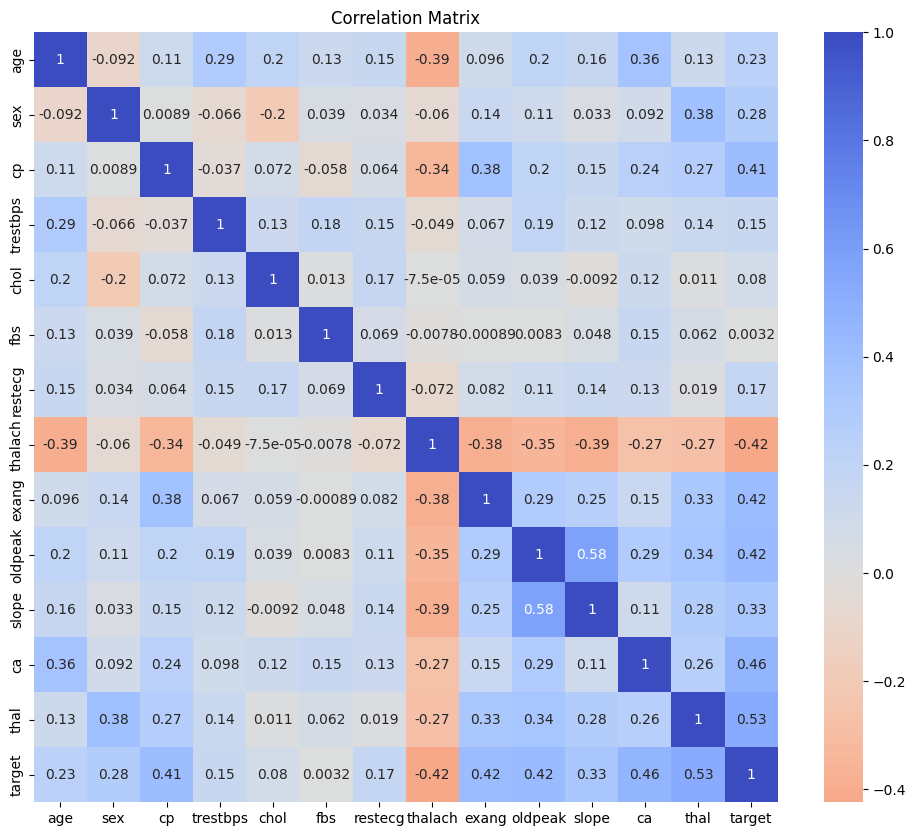

Heatmap saved as 'C:\Users\matth\OneDrive\Documents\correlation_matrix_heatmap.png'


<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Create a corelation matrix
correlation_matrix = df_cleaned.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True,  cmap='coolwarm_r', center=0)
plt.title('Correlation Matrix')
plt.show()
output_path = r'C:\Users\matth\OneDrive\Documents\correlation_matrix_heatmap.png'
plt.savefig(output_path)
print(f"Heatmap saved as '{output_path}'")

Frequency and Contingency Tables

In [ ]:
import pandas as pd 
from IPython.display import display

# Select categorical variables
categorical_columns = df_cleaned.select_dtypes(include=['category']).columns

# Create frequency tables for each categorical variable
for col in categorical_columns:
    frequency_table = df_cleaned[col].value_counts().reset_index()
    frequency_table.columns = [col, 'Frequency']
    frequency_table['Relative Frequency'] = frequency_table['Frequency'] / frequency_table['Frequency'].sum()
    print(f"Frequency Table for '{col}':\n", frequency_table, "\n")



# Creating a contingency table
def create_contingency_table(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    display(contingency_table)
    return contingency_table

create_contingency_table(df_cleaned, "sex", "target")
create_contingency_table(df_cleaned, "cp", "target")
create_contingency_table(df_cleaned, "fbs", "target")
create_contingency_table(df_cleaned, "restecg", "target")
create_contingency_table(df_cleaned, "exang", "target")
create_contingency_table(df_cleaned, "slope", "target")
create_contingency_table(df_cleaned, "ca", "target")
create_contingency_table(df_cleaned, "thal", "target")



Frequency Table for 'sex':
   sex  Frequency  Relative Frequency
0   1        201            0.676768
1   0         96            0.323232 

Frequency Table for 'cp':
   cp  Frequency  Relative Frequency
0  4        142            0.478114
1  3         83            0.279461
2  2         49            0.164983
3  1         23            0.077441 

Frequency Table for 'fbs':
   fbs  Frequency  Relative Frequency
0   0        254            0.855219
1   1         43            0.144781 

Frequency Table for 'restecg':
   restecg  Frequency  Relative Frequency
0       0        147            0.494949
1       2        146            0.491582
2       1          4            0.013468 

Frequency Table for 'exang':
   exang  Frequency  Relative Frequency
0     0        200            0.673401
1     1         97            0.326599 

Frequency Table for 'slope':
   slope  Frequency  Relative Frequency
0     1        139            0.468013
1     2        137            0.461279
2     3        

target,0,1
sex,,
0,71,25
1,89,112


target,0,1
cp,,
1,16,7
2,40,9
3,65,18
4,39,103


target,0,1
fbs,,
0,137,117
1,23,20


target,0,1
restecg,,
0,92,55
1,1,3
2,67,79


target,0,1
exang,,
0,137,63
1,23,74


target,0,1
slope,,
1,103,36
2,48,89
3,9,12


target,0,1
ca,,
0.0,129,45
1.0,21,44
2.0,7,31
3.0,3,17


target,0,1
thal,,
3.0,127,37
6.0,6,12
7.0,27,88


target,0,1
thal,,
3.0,127,37
6.0,6,12
7.0,27,88


Pearson Correlation Matrix and Scatterplots of Correlated Features

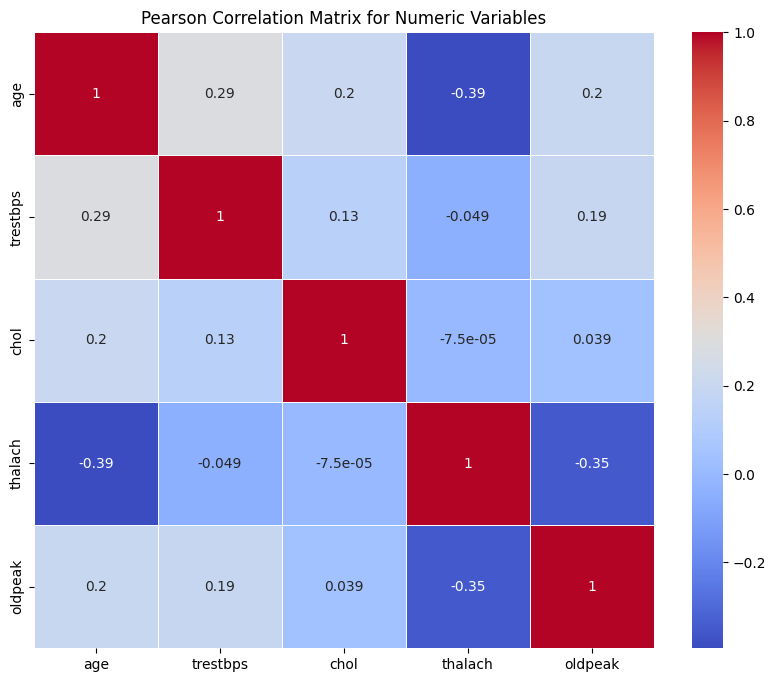

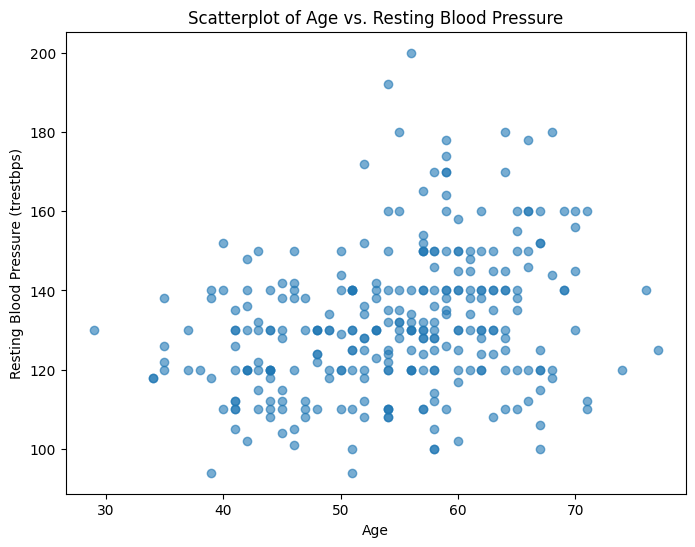

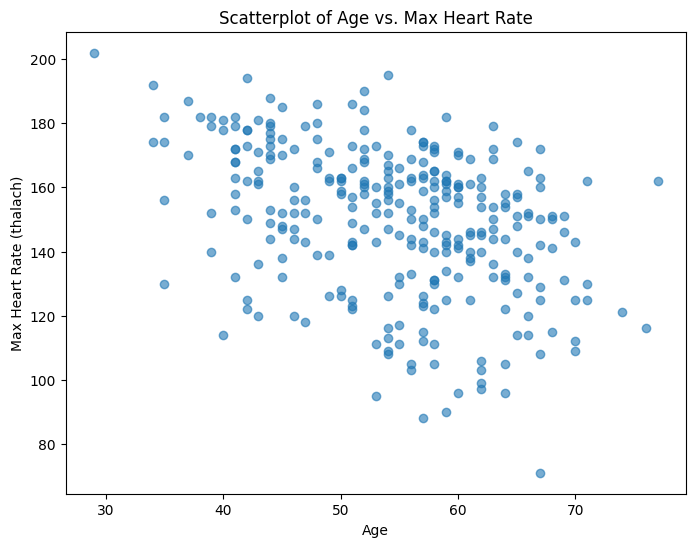

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the dataset
numeric_data = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the Pearson correlation matrix
pearson_corr = numeric_data.corr(method='pearson')

# Plotting the Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Matrix for Numeric Variables')
plt.show()

# Scatter plot of Age vs. Resting Blood Pressure (trestbps)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['age'], df_cleaned['trestbps'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.title('Scatterplot of Age vs. Resting Blood Pressure')
plt.show()

# Scatter plot of Age vs. Max Heart Rate (thalach)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['age'], df_cleaned['thalach'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.title('Scatterplot of Age vs. Max Heart Rate')
plt.show()

Spearman Correlation Matrix and Bar Charts of Target and Correlated Features

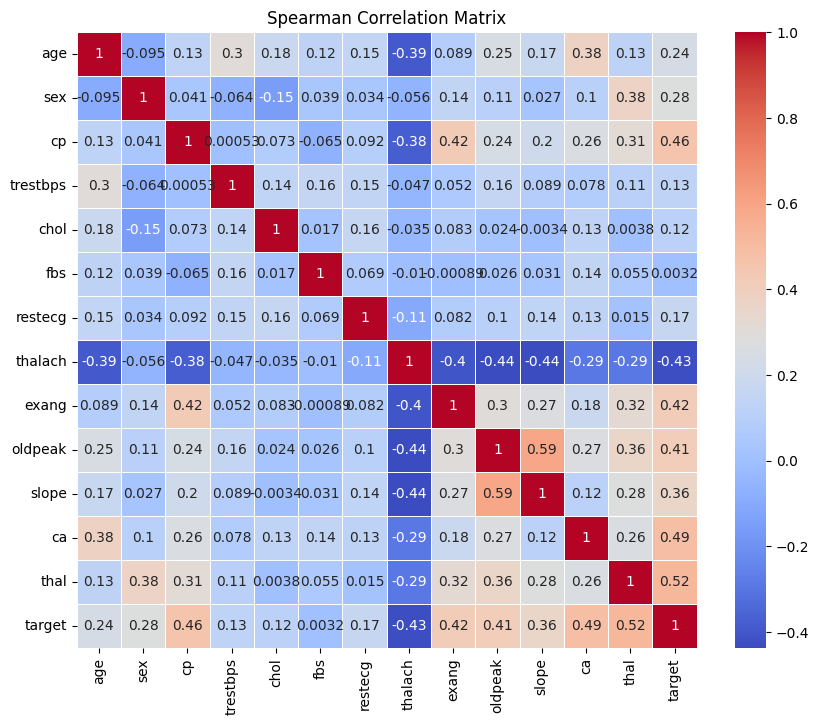

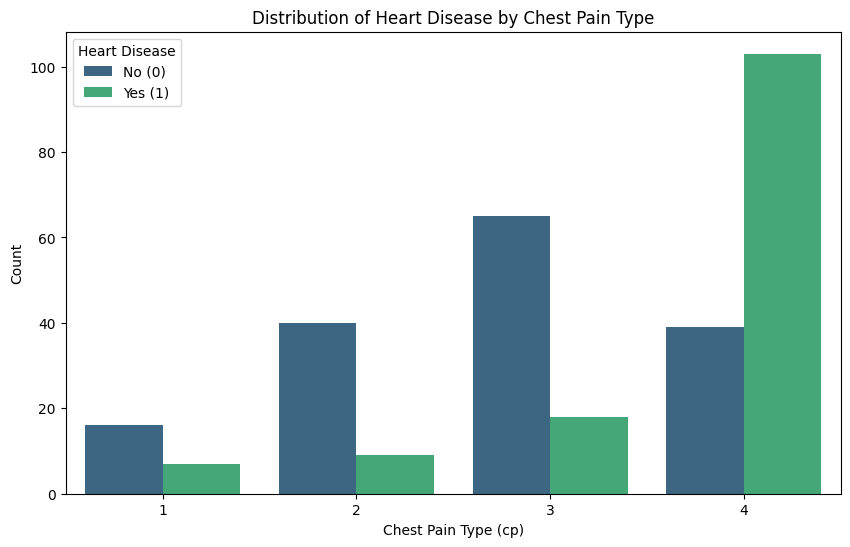

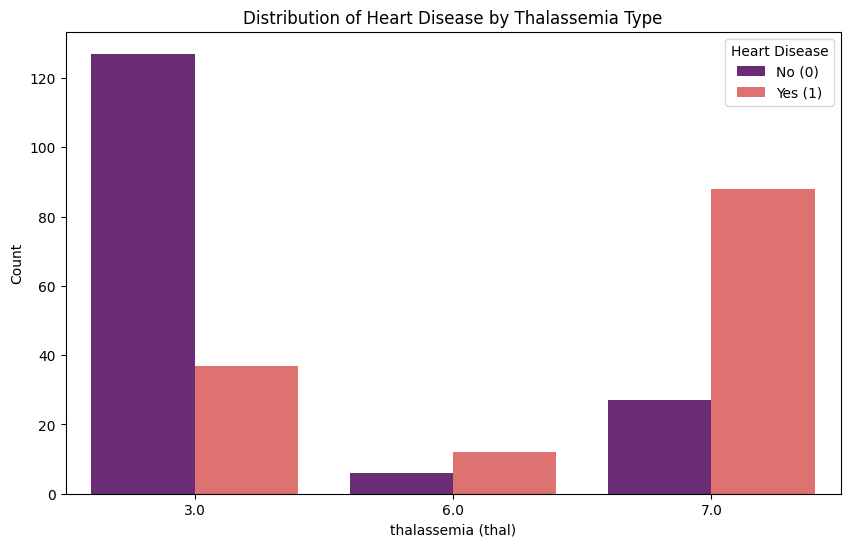

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Spearman correlation matrix
spearman_corr = df_cleaned.corr(method='spearman')

# Plotting the Spearman correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

# Create a grouped bar chart for cp vs target
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='cp', hue='target', palette='viridis')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Chest Pain Type')
plt.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
plt.show()

# Create a grouped bar chart for thal vs target
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='thal', palette='magma', hue='target')
plt.xlabel('thalassemia (thal)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Thalassemia Type')
plt.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
plt.show()

Discretize Numeric Attributes

In [2]:
import pandas as pd

#Set new data frame for discretization
df_discretized = df_cleaned.copy()

#Define domain-specific bins for each numeric attribute

# Age bins
age_bins = [0, 40, 54, 64, float('inf')]
age_labels = ["young", "middle-aged", "older", "senior"]

# Resting Blood Pressure (trestbps) bins
trestbps_bins = [0, 120, 129, 139, float('inf')]
trestbps_labels = ["normal", "elevated", "hypertension_stage1", "hypertension_stage2"]

# Cholesterol (chol) bins
chol_bins = [0, 200, 239, float('inf')]
chol_labels = ["desirable", "borderline_high", "high"]

# Maximum Heart Rate Achieved (thalach) bins
thalach_bins = [0, 100, 140, 170, float('inf')]
thalach_labels = ["low_fitness", "below_average", "average", "high_fitness"]

# ST Depression (oldpeak) bins
oldpeak_bins = [-float('inf'), 0, 1.0, 2.5, float('inf')]
oldpeak_labels = ["none", "mild", "moderate", "severe"]

# Apply domain-specific binning directly to df_discretized
df_discretized['age_bin'] = pd.cut(df_discretized['age'], bins=age_bins, labels=age_labels)
df_discretized['trestbps_bin'] = pd.cut(df_discretized['trestbps'], bins=trestbps_bins, labels=trestbps_labels)
df_discretized['chol_bin'] = pd.cut(df_discretized['chol'], bins=chol_bins, labels=chol_labels)
df_discretized['thalach_bin'] = pd.cut(df_discretized['thalach'], bins=thalach_bins, labels=thalach_labels)
df_discretized['oldpeak_bin'] = pd.cut(df_discretized['oldpeak'], bins=oldpeak_bins, labels=oldpeak_labels)

# Save the new dataset to a CSV file
csv_path = r'C:\Users\matth\OneDrive\Documents\heart_disease_discretized.csv'
df_discretized.to_csv(csv_path, index=False)

FP Growth

In [67]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Loading the dataset
file_path = r'C:\Users\matth\OneDrive\Documents\heart_disease_discretized.csv'
df_discretized = pd.read_csv(file_path)

# Drop the original numeric columns
columns_to_drop = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_discretized = df_discretized.drop(columns=columns_to_drop)

# One-hot encode the multi-category columns
categorical_columns_to_encode = ['cp', 'restecg', 'slope', 'thal']
df_encoded = pd.get_dummies(df_discretized, columns=categorical_columns_to_encode)

# One-hot encode other discrete columns
additional_columns_to_encode = ['age_bin', 'trestbps_bin', 'chol_bin', 'thalach_bin', 'oldpeak_bin', 'sex', 'fbs', 'exang', 'ca']
df_encoded = pd.get_dummies(df_encoded, columns=additional_columns_to_encode)

# Encode target variable into 'target_0' and 'target_1'
df_encoded['target_0'] = (df_discretized['target'] == 0).astype(int)
df_encoded['target_1'] = (df_discretized['target'] == 1).astype(int)
df_encoded = df_encoded.drop(columns=['target'])

# Convert the DataFrame to boolean format
df_encoded_bool = df_encoded.astype(bool)

# Apply FP-Growth to find frequent itemsets
frequent_itemsets = fpgrowth(df_encoded_bool, min_support=0.2, use_colnames=True)
print("\nFrequent Itemsets:")
print(frequent_itemsets.head())

# Generate association rules with confidence threshold
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric="confidence", min_threshold=0.8)

# Filter rules by lift
rules = rules[rules['lift'] > 1.5]

# Filter rules where heart disease is the consequent
target_variable = 'target_1'
target_rules = rules[rules['consequents'].apply(lambda x: target_variable in x)]

# Filter rules specifically for gender-related patterns
gender_rules = rules[
    (rules['antecedents'].apply(lambda x: any('sex_' in item for item in x))) |
    (rules['consequents'].apply(lambda x: any('sex_' in item for item in x)))
]
# Display all association rules and filtered rules related to heart disease
print("\nAll Association Rules:")
sorted_rules_by_lift = rules.sort_values(by='lift', ascending=False)
print(sorted_rules_by_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\nAssociation Rules related to Heart Disease:")
print(target_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("Association Rules related to Gender:")
gender_rules_sorted = gender_rules.sort_values(by='lift', ascending=False)
print(gender_rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    




Frequent Itemsets:
    support               itemsets
0  0.676768                (sex_1)
1  0.673401              (exang_0)
2  0.585859               (ca_0.0)
3  0.538721             (target_0)
4  0.508418  (thalach_bin_average)

All Association Rules:
                         antecedents           consequents   support  \
145                 (cp_4, thal_7.0)            (target_1)  0.235690   
298                 (sex_0, exang_0)  (target_0, thal_3.0)  0.205387   
133              (exang_1, target_1)                (cp_4)  0.228956   
297                (target_0, sex_0)   (exang_0, thal_3.0)  0.205387   
132                  (cp_4, exang_1)            (target_1)  0.228956   
..                               ...                   ...       ...   
224      (target_0, slope_1, ca_0.0)            (thal_3.0)  0.222222   
261  (target_0, age_bin_middle-aged)            (thal_3.0)  0.239057   
196              (target_0, slope_1)            (thal_3.0)  0.289562   
275                       

FP GROWTH Filtering for Gender Specific differences with a support of 1.5, confidence of 0.7 and lift of 1.2

In [71]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Apply FP-Growth with the specified minimum support and generate association rules
frequent_itemsets = fpgrowth(df_encoded_bool, min_support=0.15, use_colnames=True)
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric="confidence", min_threshold=0.7)

# Filter rules by lift greater than the specified minimum lift
rules = rules[rules['lift'] > 1.2]

# Filter rules associated with the target
target_rules = rules[
    rules['antecedents'].apply(lambda x: any(target in x for target in ['target_0', 'target_1'])) |
    rules['consequents'].apply(lambda x: any(target in x for target in ['target_0', 'target_1']))
]

# Separate male-specific and female-specific rules
male_rules = target_rules[
    target_rules['antecedents'].apply(lambda x: 'sex_1' in x) |
    target_rules['consequents'].apply(lambda x: 'sex_1' in x)
]

female_rules = target_rules[
    target_rules['antecedents'].apply(lambda x: 'sex_0' in x) |
    target_rules['consequents'].apply(lambda x: 'sex_0' in x)
]

# Sort by lift to get top 10 rules
male_rules_top10 = male_rules.sort_values(by='lift', ascending=False).head(10)
female_rules_top10 = female_rules.sort_values(by='lift', ascending=False).head(10)

# Results
print("\nTop 10 Male-Specific Rules Associated with Target:")
print(male_rules_top10[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\nTop 10 Female-Specific Rules Associated with Target:")
print(female_rules_top10[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



Top 10 Male-Specific Rules Associated with Target:
                        antecedents        consequents   support  confidence  \
485      (fbs_0, target_1, exang_1)      (cp_4, sex_1)  0.161616    0.774194   
475             (exang_1, target_1)      (cp_4, sex_1)  0.181818    0.729730   
488         (fbs_0, exang_1, sex_1)   (cp_4, target_1)  0.161616    0.727273   
476                (exang_1, sex_1)   (cp_4, target_1)  0.181818    0.720000   
584         (fbs_0, cp_4, thal_7.0)  (target_1, sex_1)  0.168350    0.769231   
490          (exang_1, cp_4, sex_1)  (fbs_0, target_1)  0.161616    0.800000   
574                (cp_4, thal_7.0)  (target_1, sex_1)  0.195286    0.753247   
585         (cp_4, sex_1, thal_7.0)  (fbs_0, target_1)  0.168350    0.769231   
473          (cp_4, exang_1, sex_1)         (target_1)  0.181818    0.900000   
582  (fbs_0, cp_4, sex_1, thal_7.0)         (target_1)  0.168350    0.892857   

         lift  
485  2.254269  
475  2.124801  
488  2.097087  
476

Scatterplot of Top 10 Association Rules

C:\Users\matth\AppData\Local\Temp\ipykernel_26308\1563377505.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_rules).colors


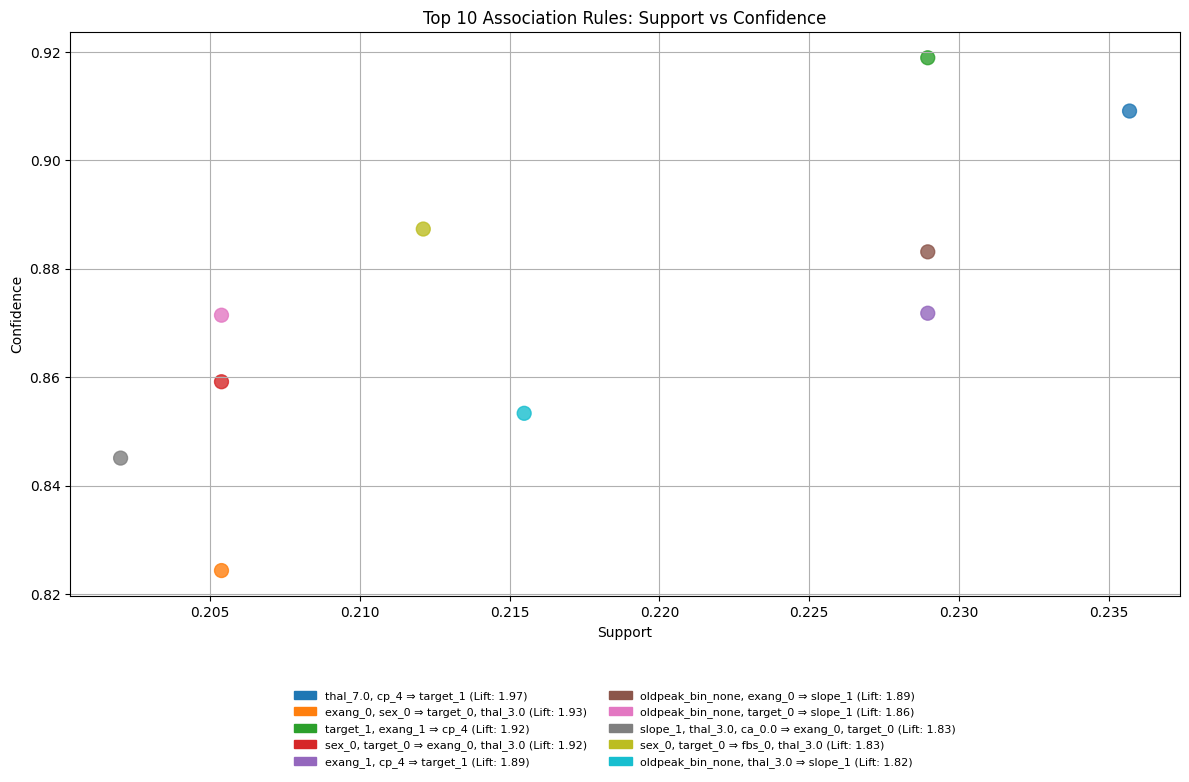

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np

# Sort the rules by lift in descending order and select the top 10
top_10_rules = rules.sort_values(by='lift', ascending=False).head(10).reset_index(drop=True)

# Generate unique colors for each rule using the 'tab10' colormap
num_rules = len(top_10_rules)
colors = plt.cm.get_cmap('tab10', num_rules).colors

# Create a scatter plot of support vs confidence
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    top_10_rules['support'], 
    top_10_rules['confidence'], 
    s= 100,
    c=colors, 
    alpha=0.8
)

# Create a legend with rule labels and their lift values
legend_patches = []
for i, row in top_10_rules.iterrows():
    rule_text = f"{', '.join(list(row['antecedents']))} ⇒ {', '.join(list(row['consequents']))}"
    lift_text = f"Lift: {row['lift']:.2f}"
    patch = mpatches.Patch(color=colors[i], label=f"{rule_text} ({lift_text})")
    legend_patches.append(patch)

# Add the legend to bottom of the plot
plt.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, -0.15), 
           fontsize=8, ncol=2, frameon=False)

# Plot labels and title
plt.title("Top 10 Association Rules: Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.grid(True)
plt.tight_layout()
plt.show()




Association Rules using Apriori Method in R for Comparison

In [ ]:
#R Code for Association Rules

# Install and load required packages
if (!requireNamespace("arules", quietly = TRUE)) install.packages("arules")
if (!requireNamespace("arulesViz", quietly = TRUE)) install.packages("arulesViz")

library(arules)
library(arulesViz)

# Load the dataset from the CSV file
fp <- "C:\\Users\\matth\\OneDrive\\Documents\\heart_disease_discretized.csv"
df_discretized <- read.csv(fp)

# Convert the dataframe into a binary matrix
df_binary <- as.data.frame(lapply(df_discretized, as.factor))

# Convert the dataframe to a transactions object required by arules
transactions <- as(df_binary, "transactions")

# Generate association rules using the Apriori algorithm
rules <- apriori(transactions, parameter = list(supp = 0.2, conf = 0.8))

# Display the association rules
cat("\nAssociation Rules:\n")
inspect(rules)

# Step 5: Visualize the top 10 rules
plot(rules, method = "graph", engine = "htmlwidget", control = list(type = "items"))

Loading required package: Matrix


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[418 item(s), 297 transaction(s)] done [0.00s].
sorting and recoding items ... [30 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [388 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].

Association Rules:
      lhs                                         rhs                support  
[1]   {}                                       => {fbs=0}            0.8552189
[2]   {oldpeak_bin=mild}                       => {fbs=0}            0.2188552
[3]   {thalach_bin=below_ave

Warning message:
"Unknown control parameters: type"


Available control parameters (with default values):
itemCol	 =  #CBD2FC
nodeCol	 =  c("#EE0000", "#EE0303", "#EE0606", "#EE0909", "#EE0C0C", "#EE0F0F", "#EE1212", "#EE1515", "#EE1818", "#EE1B1B", "#EE1E1E", "#EE2222", "#EE2525", "#EE2828", "#EE2B2B", "#EE2E2E", "#EE3131", "#EE3434", "#EE3737", "#EE3A3A", "#EE3D3D", "#EE4040", "#EE4444", "#EE4747", "#EE4A4A", "#EE4D4D", "#EE5050", "#EE5353", "#EE5656", "#EE5959", "#EE5C5C", "#EE5F5F", "#EE6262", "#EE6666", "#EE6969", "#EE6C6C", "#EE6F6F", "#EE7272", "#EE7575", "#EE7878", "#EE7B7B", "#EE7E7E", "#EE8181", "#EE8484", "#EE8888", "#EE8B8B",  "#EE8E8E", "#EE9191", "#EE9494", "#EE9797", "#EE9999", "#EE9B9B", "#EE9D9D", "#EE9F9F", "#EEA0A0", "#EEA2A2", "#EEA4A4", "#EEA5A5", "#EEA7A7", "#EEA9A9", "#EEABAB", "#EEACAC", "#EEAEAE", "#EEB0B0", "#EEB1B1", "#EEB3B3", "#EEB5B5", "#EEB7B7", "#EEB8B8", "#EEBABA", "#EEBCBC", "#EEBDBD", "#EEBFBF", "#EEC1C1", "#EEC3C3", "#EEC4C4", "#EEC6C6", "#EEC8C8", "#EEC9C9", "#EECBCB", "#EECDCD", "#EECFCF", "#EED0D0", 

Warning message:
"Too many rules supplied. Only plotting the best 100 using 'lift' (change control parameter max if needed)."


HTML widgets cannot be represented in plain text (need html)

Information Gain for Feature Selection

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = r'C:\Users\matth\OneDrive\Documents\heart_disease_discretized.csv'
df_feature = pd.read_csv(file_path)

# Define target variable
y = df_feature['target']

# Drop binned columns and keep only the original continuous features
columns_to_keep = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 
                   'cp', 'sex', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
X = df_feature[columns_to_keep]

# Convert categorical features to numerical
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Calculate information gain for each feature
info_gain = mutual_info_classif(X, y, discrete_features=False)
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain': info_gain
})

# Sort features by their information gain in descending order
feature_scores = feature_scores.sort_values(by='Information Gain', ascending=False)

# Display results
print("\nInformation Gain for each feature:")
print(feature_scores)





Information Gain for each feature:
     Feature  Information Gain
12      thal          0.124854
11        ca          0.119792
5         cp          0.113558
4    oldpeak          0.100546
3    thalach          0.096018
2       chol          0.086464
9      exang          0.067433
10     slope          0.053574
8    restecg          0.021114
6        sex          0.011748
7        fbs          0.007292
1   trestbps          0.005624
0        age          0.000000


Bar Graph of Information Gain

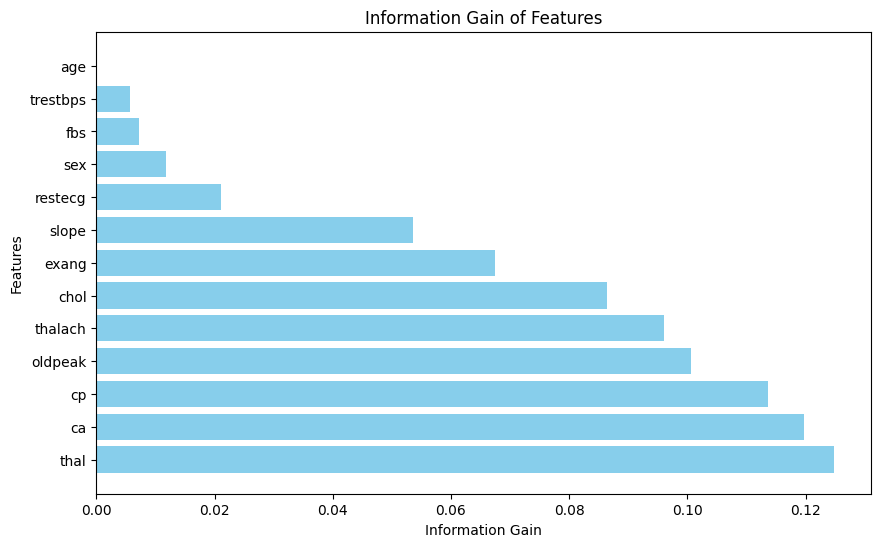

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the information gain of each feature
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['Feature'], feature_scores['Information Gain'], color='skyblue')
plt.title('Information Gain of Features')
plt.xlabel('Information Gain')
plt.ylabel('Features')
plt.show()


Function for Stratified 10-Fold Cross Validation and Splitting the Data 80/20. Returns Accuracy, Precision, Sensitivity, Specificity

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split

def cross_validate_model(model_fn, datasset):

    # Load and split data
    x = datasset.drop('target', axis=1)
    y = datasset['target']

    # Stratified 10-Fold cross-validation
    n_splits = 10
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

    # Initialize lists to store metrics
    cumulative_conf_matrix = np.zeros((2, 2), dtype=float)  # For confusion matrices
    total_accuracy = 0

    # Cross-validation loop
    for train_index, test_index in skf.split(x, y):
        # Split data into fold-specific training and testing sets
        x_fold_train, x_fold_test = x.iloc[train_index], x.iloc[test_index]
        y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]

        # Scale the features
        scaler = StandardScaler()
        x_fold_train = scaler.fit_transform(x_fold_train)
        x_fold_test = scaler.transform(x_fold_test)

        # Create an 80-20 split for the fold
        x_train, x_val, y_train, y_val = train_test_split(
            x_fold_train, y_fold_train, test_size=0.2, random_state=1, stratify=y_fold_train
        )

        # Train the model
        model = model_fn()
        model.fit(x_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(x_val)

        # Calculate accuracy for this fold
        accuracy = accuracy_score(y_val, y_pred)
        total_accuracy += accuracy

        # Update confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        cumulative_conf_matrix += cm

    # Calculate average accuracy
    average_accuracy = total_accuracy / n_splits

    # Calculate average confusion matrix
    average_conf_matrix = cumulative_conf_matrix / n_splits

    # Calculate metrics from the average confusion matrix
    tn, fp, fn, tp = average_conf_matrix.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    false_negatives = fn

    # Print the results
    print(f"Average Accuracy: {average_accuracy:.4f}")
    print(f"Average Confusion Matrix Across All Folds:\n{average_conf_matrix}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Average False Negatives: {false_negatives:.4f}")

    # Return results
    return average_accuracy, average_conf_matrix, sensitivity, specificity, precision, false_negatives


Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

# Call the function with Logistic Regression
results = cross_validate_model(lambda: LogisticRegression(max_iter=1000, random_state=1), df_cleaned)

Average Accuracy: 0.8130
Average Confusion Matrix Across All Folds:
[[26.6  2.4]
 [ 7.7 17.3]]
Sensitivity: 0.6920
Specificity: 0.9172
Precision: 0.8782
Average False Negatives: 7.7000


Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Call the function with Random Forest
results = cross_validate_model(lambda: RandomForestClassifier(n_estimators=100, random_state=1), df_cleaned)

Average Accuracy: 0.8037
Average Confusion Matrix Across All Folds:
[[25.7  3.3]
 [ 7.3 17.7]]
Sensitivity: 0.7080
Specificity: 0.8862
Precision: 0.8429
Average False Negatives: 7.3000


K Nearest Neighbours

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Call the function with K-Nearest Neighbors
results = cross_validate_model(lambda: KNeighborsClassifier(n_neighbors=5), df_cleaned)

Average Accuracy: 0.7759
Average Confusion Matrix Across All Folds:
[[24.5  4.5]
 [ 7.6 17.4]]
Sensitivity: 0.6960
Specificity: 0.8448
Precision: 0.7945
Average False Negatives: 7.6000


Logistic Regression, Random Forest and K Nearest Neighbours using Feature Selection

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Selected features based on Information Gain > 0.05
selected_features = [
    'thal', 'ca', 'cp', 'oldpeak', 'thalach', 
    'chol', 'exang', 'slope'
]
x = df_cleaned[selected_features]
y = df_cleaned['target']         

# Set Feature Selected Dataset
df_selected = pd.concat([x, y], axis=1)

# Re-run the cross-validation function with the selected features
LogResults = cross_validate_model(lambda: LogisticRegression(max_iter=1000, random_state=1), df_selected)
RFResults = cross_validate_model(lambda: RandomForestClassifier(n_estimators=100, random_state=1), df_selected)
KNNResults = cross_validate_model(lambda: KNeighborsClassifier(n_neighbors=5), df_selected)

Average Accuracy: 0.8185
Average Confusion Matrix Across All Folds:
[[26.4  2.6]
 [ 7.2 17.8]]
Sensitivity: 0.7120
Specificity: 0.9103
Precision: 0.8725
Average False Negatives: 7.2000
Average Accuracy: 0.7981
Average Confusion Matrix Across All Folds:
[[25.3  3.7]
 [ 7.2 17.8]]
Sensitivity: 0.7120
Specificity: 0.8724
Precision: 0.8279
Average False Negatives: 7.2000
Average Accuracy: 0.7870
Average Confusion Matrix Across All Folds:
[[24.4  4.6]
 [ 6.9 18.1]]
Sensitivity: 0.7240
Specificity: 0.8414
Precision: 0.7974
Average False Negatives: 6.9000


In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Filter datasets for males and females
male_data = df_cleaned[df_cleaned['sex'] == 1]
female_data = df_cleaned[df_cleaned['sex'] == 0]

# Define models
models = {
    'Logistic Regression': lambda: LogisticRegression(max_iter=1000, random_state=1),
    'Random Forest': lambda: RandomForestClassifier(n_estimators=100, random_state=1),
    'KNN': lambda: KNeighborsClassifier(n_neighbors=5)
}

# Evaluate each model on the male dataset
print("Performance on Male Dataset:")
for model_name, model_fn in models.items():
    print(f"\n{model_name}:")
    cross_validate_model(model_fn, male_data)

# Evaluate each model on the female dataset
print("\nPerformance on Female Dataset:")
for model_name, model_fn in models.items():
    print(f"\n{model_name}:")
    cross_validate_model(model_fn, female_data)



Performance on Male Dataset:

Logistic Regression:
Average Accuracy: 0.7967
Average Confusion Matrix Across All Folds:
[[13.2  2.9]
 [ 4.6 16.2]]
Sensitivity: 0.7788
Specificity: 0.8199
Precision: 0.8482
Average False Negatives: 4.6000

Random Forest:
Average Accuracy: 0.7616
Average Confusion Matrix Across All Folds:
[[12.1  4. ]
 [ 4.8 16. ]]
Sensitivity: 0.7692
Specificity: 0.7516
Precision: 0.8000
Average False Negatives: 4.8000

KNN:
Average Accuracy: 0.7887
Average Confusion Matrix Across All Folds:
[[12.9  3.2]
 [ 4.6 16.2]]
Sensitivity: 0.7788
Specificity: 0.8012
Precision: 0.8351
Average False Negatives: 4.6000

Performance on Female Dataset:

Logistic Regression:
Average Accuracy: 0.8944
Average Confusion Matrix Across All Folds:
[[11.9  1.1]
 [ 0.8  4.2]]
Sensitivity: 0.8400
Specificity: 0.9154
Precision: 0.7925
Average False Negatives: 0.8000

Random Forest:
Average Accuracy: 0.9278
Average Confusion Matrix Across All Folds:
[[12.5  0.5]
 [ 0.8  4.2]]
Sensitivity: 0.8400
Sp